# Deliver With Drones

**Google's Hashcode 2016**

Considering a variety of products distributed through warehouses, the problem consists in deliver these products to client houses through orders. For this there are a given number of drones with a certain maximum payload.

The drones all start in the first specified warehouse and can travel to any point, load products from a warehouse, drop products in the client's house or in another warehouse, or just wait for a few turns.

The idea is to optimize the time that takes to deliver the maximum number of orders possible in the least amount of time.

## 1. Understanding the data

Fancy frase sobre os dados que temos

In [21]:
import matplotlib.pyplot as plt
import numpy as np


# Converting a list of places to a numpy array of 2D positions
def places_location(places):
    locations = [place.location for place in places]

    return np.array(locations)


def plot_simulation(simulation):
    orders = places_location(simulation.orders)
    warehouses = places_location(simulation.warehouses)
    
    orders_x, orders_y = orders.T
    warehouses_x, warehouses_y = warehouses.T

    plt.scatter(orders_x, orders_y, color='blue', s=1, label='order')
    plt.scatter(warehouses_x, warehouses_y, color='red', s=100, label='warehouse')

    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

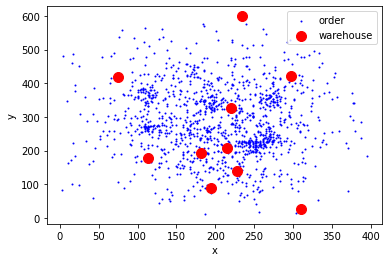

In [22]:
import delivery.input.file_parsing as file_parsing

busy_day_simulation = file_parsing.parse('data/busy_day.in')

plot_simulation(busy_day_simulation)

INSERIR AQUI ALGUMA DE COMO É IMPOSSÍVEL FAZER ALGORITMOS QUE RESOLVAM ISTO EM TEMPO UTIL E DIZER QUE VAMOS TESTAR COM CENAS MAIS SIMPLES MAS FUNCIONA EM TODOS

In order to test the algorithms and obtain results in a short period of time we are going to use a smaller dataset with 10 warehouses and 300 orders distributed in a 300x300 grid that looks as follows

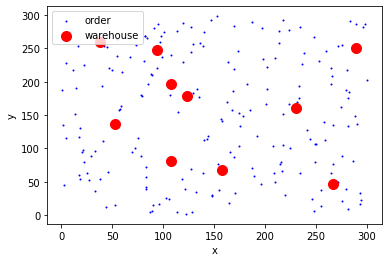

In [30]:
custom_simulation = file_parsing.parse('data/custom.in')

plot_simulation(custom_simulation)

## Genetic Algorithms Approach

Let's start with an obvious solution to understand the problem better.

The problem specified in _data/obvious.in_ has 3 orders to 3 different houses, 2 of them (order1 and order2) require only one product and the other (order0) requires 2 products. These 2 products can be found in the same warehouse. To conclude this, there are 3 available drones and their payload is high enough to carry any set of available products.

The trivial and correct solution would be to assign one drone to each delivery, this is, a drone takes care of the order1 product, other takes care of the order2 product, and finally the last one takes care of the 2 products of order0.

The solution will display a list of deliveries for each drone.

In [1]:
import delivery.input.file_parsing as file_parsing
from delivery.algorithm.genetic.genetic import GeneticAlgorithm
from delivery.algorithm.genetic.selection import TournamentSelection

# reads the input file
simulation = file_parsing.parse("data/obvious.in")

# runs the algorithm
selection_method = TournamentSelection(15)
algorithm = GeneticAlgorithm(simulation, max_improveless_iterations=10, population_size=30, generational=True, log=False, mutation_probability=0.5)
transportation = algorithm.run()

# the algorithm returns a chromosome with a solution
# these transportation are here split to ease for human reading
print(f"fitness: {transportation.fitness}")
algorithm.split_into_deliveries(transportation.solution)

fitness: 256


[[p[1, 10] d0 w0 o0], [p[0] d1 w0 o1], [p[25] d2 w1 o2]]

Adding another larger order, one can notice that the algorithm assigns that order to a single drone.

This is not done manually. The algorithm is fed one product at a time, it then groups the products from the same order together to reduce the amount of travels. 

In [2]:
simulation = file_parsing.parse("data/fouroo.in")

algorithm.simulation = simulation
transportation = algorithm.run()

print(f"fitness: {transportation.fitness}")
algorithm.split_into_deliveries(transportation.solution)

fitness: 304


[[p[30] d0 w1 o1],
 [p[50] d1 w1 o2],
 [p[20, 0] d2 w0 o0, p[51, 40, 31] d2 w1 o3]]